In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import display

In [4]:
df = pd.read_csv("../data/raw/Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


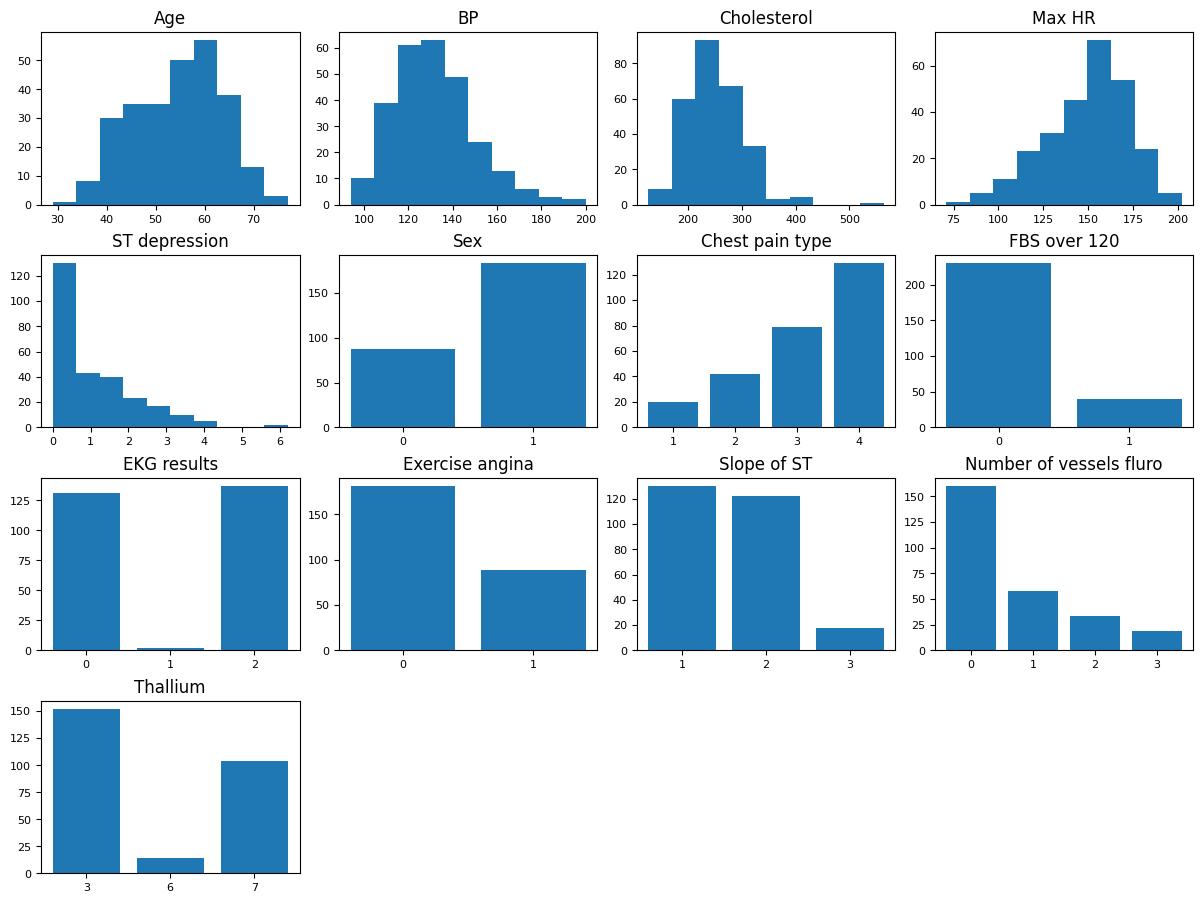

In [6]:
continuous = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
categorical = [
    'Sex', 'Chest pain type', 'FBS over 120', 'EKG results',
    'Exercise angina', 'Slope of ST',
    'Number of vessels fluro', 'Thallium'
]

fig, axes = plt.subplots(4, 4, figsize=(12, 9))
axes = axes.flatten()

i = 0
for col in continuous:
    axes[i].hist(df[col], bins=10)
    axes[i].set_title(col)
    axes[i].tick_params(labelsize=8)
    i += 1

for col in categorical:
    counts = df[col].value_counts().sort_index()
    axes[i].bar(counts.index.astype(str), counts.values)
    axes[i].set_title(col)
    axes[i].tick_params(labelsize=8)
    i += 1


for j in range(i, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=0.6)
plt.show()


# Classify columns for analysis
Heart disease (Target)

## Binary data
- Sex (0 = female, 1 = male)
- FBS over 120 (0 = no, 1 = yes)
- Exercise Angina (0 = no, 1 = yes)

## Nominal data
Thallium; categorical test outcomes

## Ordinal data
- Chest pain (1-4)
- EKG test results (0-2), there is exactly one instance of 1
- Slope of ST (1-3)
- Number of vessels fluro (0-3)

## Ratio data
- Age
- BP
- Cholestorol
- Max HR
- ST Depression

# Heart disease prevalence by category

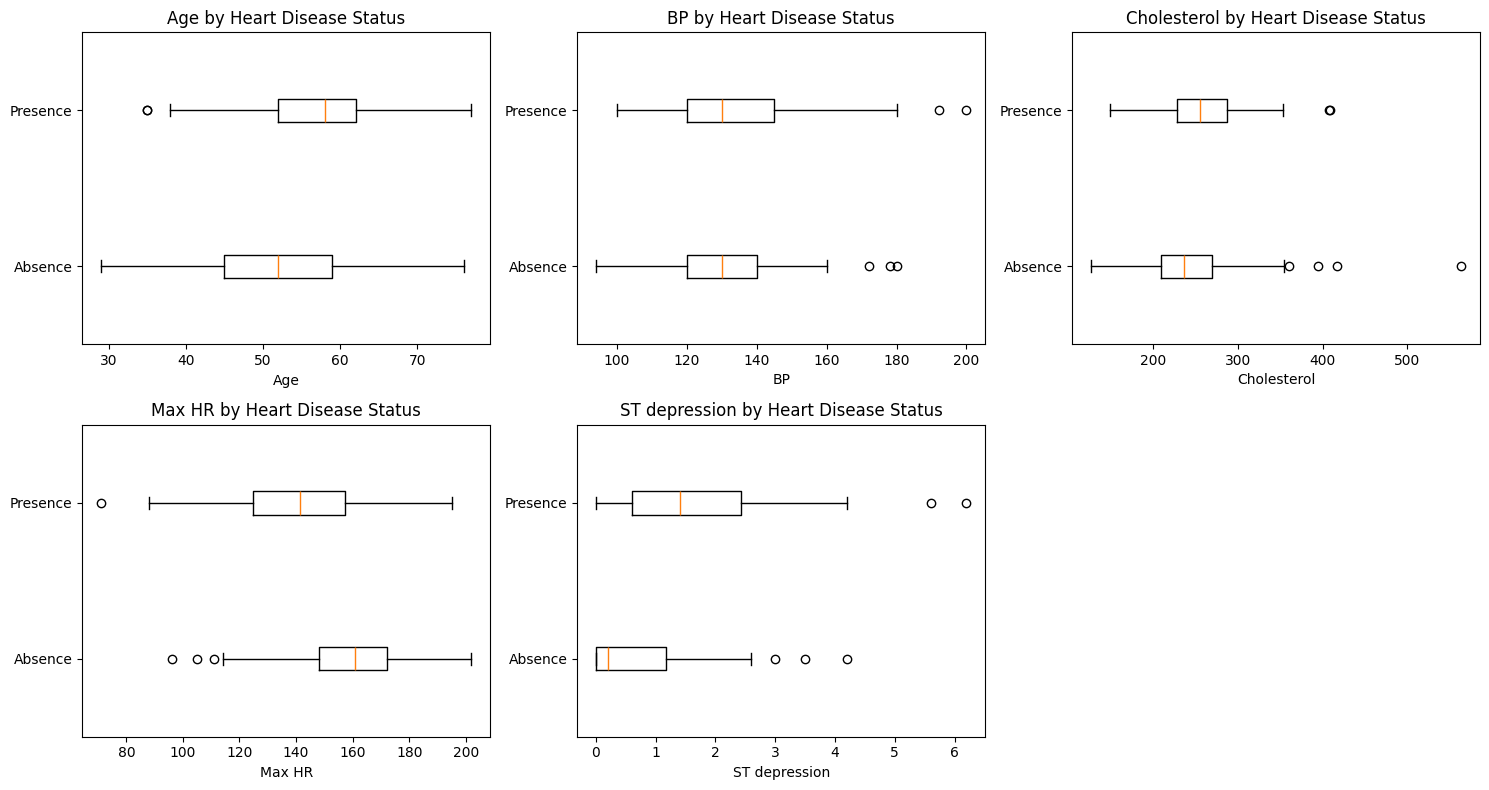

In [7]:
n_plots = len(continuous)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(continuous):
    axes[i].boxplot(
        [df[df['Heart Disease'] == 'Absence'][col],
         df[df['Heart Disease'] == 'Presence'][col]],
        vert=False,
        tick_labels=['Absence', 'Presence']
    )
    axes[i].set_title(f'{col} by Heart Disease Status')
    axes[i].set_xlabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

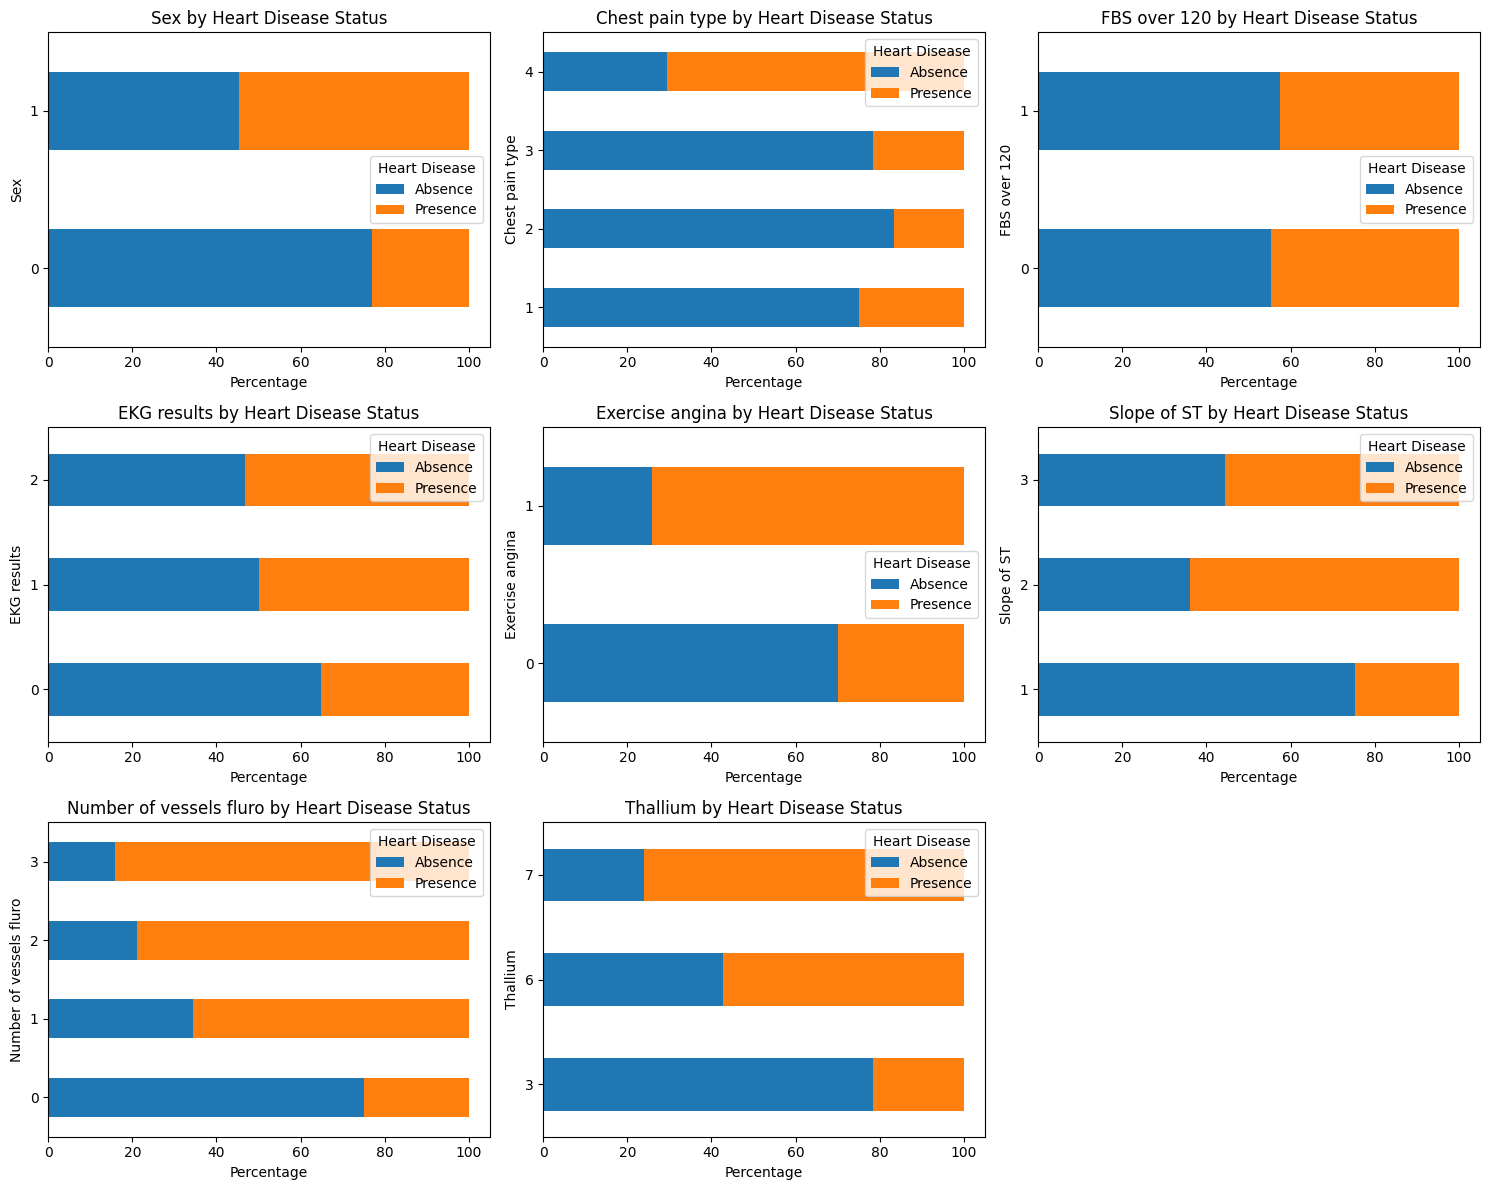

In [8]:
n_plots = len(categorical)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical):
    ct = pd.crosstab(df[col], df['Heart Disease'], normalize='index') * 100
    ct.plot(kind='barh', stacked=True, ax=axes[i])
    axes[i].set_title(f'{col} by Heart Disease Status')
    axes[i].set_xlabel('Percentage')
    axes[i].legend(title='Heart Disease', labels=['Absence', 'Presence'])

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Age**: The age distribution for patients with heart disease is shifted toward older ages compared to patients without heart disease.

**Blood Pressure**: Medians are close, IQRs overlap heavily. BP shows little standalone signal here

**Cholesterol**: Close medians, heavy right tail outliers in absence. Cholestorol does not tell us much in this dataset.

**Max HR**: Strong signal. Presence group has a noticeably lower median and IQR. This is one of the better continuous predictors so far.

**ST depression**: Strong seperation, presence has higher values with little overlap. Also one of the better signals.

**Sex**: Males have a higher rate of heart disease in this dataset.

**Chest Pain Type**: 4 having the highest association with heart disease while 1-3 skews towards not having heart disease.

**FBS over 120**: Its a weak signal.

**Exercise angina**: Strong signal. Presence is much more common when exercise-induced angina is present.

**Chest Pain Type**: Type 4 is heavily associated with disease presence, while types 1–3 skew absence. Very strong feature.

**EKG results**: Mild signal. Value of 2 tends towards presence.

**Slope of ST**: Slope = 2 and 3 associate with presence where slope = 1 skews absence.

**Number of vessels fluro**: More vessels means higher disease presence. Good ordinal predictor.

**Thallium**: Higher values are associated with presence of heart disease.

# Feature Ranking (w/o modelling)
Which variables show the strongest statistical association with the target in isolation?

## Ratio Data
Spearmans correlation coefficient measures the strength and direction of monotonic relationships between variables:

- **Coefficient (rho) ranges from -1 to +1**:
  - Close to +1: Strong positive association (as one increases, the other tends to increase)
  - Close to -1: Strong negative association (as one increases, the other tends to decrease)
  - Close to 0: Weak/no monotonic relationship
- **P-value < 0.05**: Statistically significant relationship

Spearman was chosen because doesnt assume linear relationships, making it more appropriate for medical data

In [9]:
ratio_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']


df['heart_disease_bin'] = (df['Heart Disease'] == 'Presence').astype(int)
results = []
for col in ratio_features:
    rho, p = stats.spearmanr(df[col], df['heart_disease_bin'])
    results.append({'feature': col, 'spearman_rho': rho, 'p_value': p})

ratio_rank = pd.DataFrame(results).assign(
    abs_rho=lambda x: x.spearman_rho.abs()
).sort_values('abs_rho', ascending=False)



display(
    ratio_rank[['feature', 'abs_rho', 'p_value']]
        .rename(columns={
            'feature': 'Feature',
            'abs_rho': '|Spearman rho|',
            'p_value': 'p-value'
        })
)


,Feature,|Spearman rho|,p-value
3,Max HR,0.419741,6.006785e-13
4,ST depression,0.405359,4.221271e-12
0,Age,0.226405,1.755820e-04
2,Cholesterol,0.162530,7.449059e-03
1,BP,0.131147,3.121824e-02


Max HR and ST depression gives us the best monotonic relationship between them and heart disease (size of one variable increases as the other variables also increases) among ratio variables. While BP and cholesterol exhibit weak association. 

## Categorical

**Chi-squared test**: Tests for relationships between categorical variables
- High χ² + low p-value (< 0.05): Variables are likely related
- Low p-value: Strong evidence of association
- Cramer's V: Measures strength (0=none, 0.1=weak, 0.3=moderate, 0.5+=strong)

In [10]:
categorical_features = [
    'Sex', 'Chest pain type', 'FBS over 120', 'EKG results',
    'Exercise angina', 'Slope of ST', 
    'Number of vessels fluro', 'Thallium'
]

df['heart_disease_bin'] = (df['Heart Disease'] == 'Presence').astype(int)
n = df.shape[0]


results = []
for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['heart_disease_bin'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    r, k = contingency_table.shape
    
    cramers_v = np.sqrt(chi2 / (n * (min(r - 1, k - 1)))) # type: ignore
    
    results.append({'feature': col, 
                    'chi2_statistic': chi2, 
                    'p_value': p,
                    'cramers_v': cramers_v})

cat_rank = (pd.DataFrame(results)
            .sort_values('chi2_statistic', ascending=False))
display(
    cat_rank[['feature', 'chi2_statistic', 'p_value', 'cramers_v']]
        .rename(columns={
            'feature': 'Feature',
            'chi2_statistic': 'Chi-squared',
            'p_value': 'p-value',
            'cramers_v': "Cramer's V"
        })
)

,Feature,Chi-squared,p-value,Cramer's V
7,Thallium,74.569346,6.419071e-17,0.525531
1,Chest pain type,68.588207,8.560988e-15,0.504014
6,Number of vessels fluro,62.863092,1.436620e-13,0.482521
4,Exercise angina,45.691873,1.383958e-11,0.411375
5,Slope of ST,40.370391,1.712699e-09,0.386678
0,Sex,22.667256,1.926226e-06,0.289746
3,EKG results,8.979452,1.122372e-02,0.182366
2,FBS over 120,0.009171,9.237061e-01,0.005828


NOTE: EKG results has a category with count 1, which can violate chi-squares expected-frequency assumptions.

**Statistical Significance (p-value)**:
- All features show p-value < 0.05, indicating statistically significant associations with heart disease
- FBS over 120 has the weakest significance (p = 0.92), which suggesting minimal relationship

### Cramers V

**Strong associations (V > 0.3)**:
  - Thallium (0.53): Strongest predictor
  - Chest pain type (0.50): Very strong relationship
  - Number of vessels fluro (0.48): Strong predictor
  - Exercise angina (0.41): Moderately strong
  - Slope of ST (0.39): Moderately strong

**Moderate associations (V = 0.1-0.3)**:
  - Sex (0.29): Moderate relationship
  - EKG results (0.18): Weak to moderate

**Weak associations (V < 0.1)**:
  - FBS over 120 (0.006): Essentially no relationship despite being categorical


Thallium stress test results and chest pain type are the strongest categorical predictors of heart disease. Fasting blood sugar over 120 shows almost no association with heart disease presence in this dataset. Vessel fluoro count and exercise angina are also strong indicators

## Conclusion
Based on the statistical analysis of the dataset the the ranking of features are:
| Importance       | Features                                                         | Reasoning                                                   |
|------------------|------------------------------------------------------------------|-------------------------------------------------------------|
| High             | Thallium, Chest Pain Type, Max HR, ST Depression, Vessels Fluoro | Strongest statistical association                           |
| Moderate         | Exercise Angina, Slope of ST, Sex, Age                           | Moderate predictive power. Useful for refining predictions. |
| Low / Not Useful | FBS over 120, Cholesterol, BP                                    | Negligible relationship                                     |

These rankings reflect univariate associations only so features with weak isolated signal may still contribute in a multivariate model through interactions or conditional effects.
